In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [78]:
df = pd.read_csv('final_scout_not_dummy.csv')

In [79]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans
price,15770,14500,14640,14500,16790,15090,16422,14480,16700,17990
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible
km,56013.0,80000.0,83450.0,73000.0,16200.0,63668.0,62111.0,14986.0,57000.0,16103.0
Type,Used,Used,Used,Used,Used,Used,Used,Used,Used,Used
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel,Diesel,Diesel,Diesel,Diesel,Benzine
Gears,7.0,7.0,7.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid...","Air suspension,Armrest,Auxiliary heating,Elect...","Air conditioning,Armrest,Automatic climate con...","Air conditioning,Armrest,Automatic climate con...","Air conditioning,Armrest,Automatic climate con...","Air conditioning,Armrest,Electrical side mirro...","Air conditioning,Power windows","Air conditioning,Armrest,Automatic climate con..."
Entertainment_Media,"Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,Hands-free equipment,On-board comput...","MP3,On-board computer","Bluetooth,CD player,Hands-free equipment,MP3,O...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,CD player,Hands-free equipment,On-bo...","CD player,MP3,Radio",Radio,Radio


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [81]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

<AxesSubplot:>

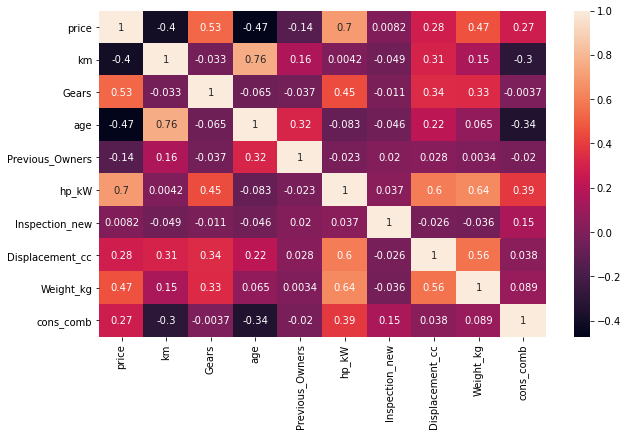

In [82]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True)

In [83]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [84]:
df.make_model.value_counts()


Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [85]:
df = df[df.make_model !='Audi A2']

In [86]:
df.make_model.value_counts()


Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

In [87]:
df.body_type.value_counts()

Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Transporter        88
Off-Road           55
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [88]:
df = df[df.body_type !='Convertible']

In [89]:
df.body_type.value_counts()

Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Transporter        88
Off-Road           55
Coupe              25
Name: body_type, dtype: int64

In [90]:
df.vat.value_counts()

VAT deductible      15036
Price negotiable      870
Name: vat, dtype: int64

In [91]:
df.km.value_counts()

10.000000       1044
1647.362609      985
1.000000         367
5.000000         170
50.000000        148
                ... 
20719.000000       1
91910.000000       1
39860.000000       1
28084.000000       1
57889.000000       1
Name: km, Length: 6686, dtype: int64

In [92]:
df.km.describe()

count     15906.000000
mean      32096.180856
std       36984.785010
min           0.000000
25%        1914.250000
50%       20413.500000
75%       46921.000000
max      317000.000000
Name: km, dtype: float64

<AxesSubplot:xlabel='km', ylabel='Count'>

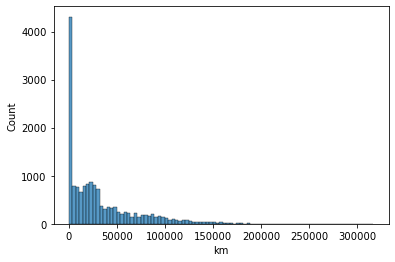

In [94]:
sns.histplot(df.km)

C:\Users\rusla\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km'>

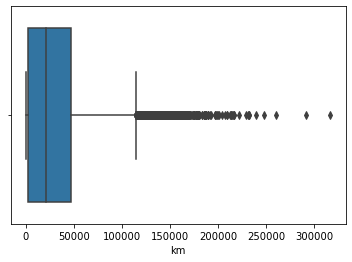

In [95]:
sns.boxplot(df.km)

In [96]:
df.Type.value_counts()

Used              11088
New                1649
Pre-registered     1364
Employee's car     1009
Demonstration       796
Name: Type, dtype: int64

In [97]:
df.Fuel.value_counts()

Benzine     8545
Diesel      7292
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

In [98]:
df = df[df.Fuel !='Electric' ]

In [99]:
df.Fuel.value_counts()

Benzine    8545
Diesel     7292
LPG/CNG      64
Name: Fuel, dtype: int64

In [100]:
df.Comfort_Convenience.value_counts()

Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                             388
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system                                                                                                                                             187
Air conditioning,Armrest,Automatic

In [101]:
df.drop("Comfort_Convenience", axis=1,inplace=True)
df.drop("Entertainment_Media", axis=1,inplace=True)
df.drop("Extras", axis=1,inplace=True)
df.drop("Safety_Security", axis=1,inplace=True)

In [102]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [103]:
df.age.value_counts()

1.0    4519
0.0    4433
3.0    3676
2.0    3273
Name: age, dtype: int64

In [104]:
df.Previous_Owners.value_counts()

1.0    14144
2.0     1172
0.0      554
3.0       29
4.0        2
Name: Previous_Owners, dtype: int64

In [105]:
df = df[df.Previous_Owners != 4.0]

In [106]:
df.Previous_Owners.value_counts()

1.0    14144
2.0     1172
0.0      554
3.0       29
Name: Previous_Owners, dtype: int64

In [107]:
df.hp_kW.value_counts()

85.0     2543
66.0     2121
81.0     1402
100.0    1316
110.0    1109
         ... 
84.0        1
137.0       1
123.0       1
150.0       1
75.0        1
Name: hp_kW, Length: 77, dtype: int64

<AxesSubplot:xlabel='hp_kW', ylabel='Count'>

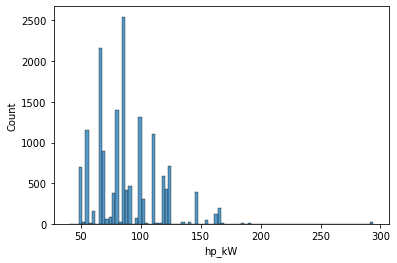

In [108]:
sns.histplot(df.hp_kW)

C:\Users\rusla\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hp_kW'>

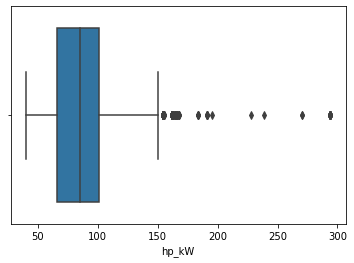

In [109]:
sns.boxplot(df.hp_kW)

In [110]:
df.Inspection_new.value_counts()

0    11967
1     3932
Name: Inspection_new, dtype: int64

In [111]:
df.Paint_Type.value_counts()

Metallic       15230
Uni/basic        637
Perl effect       32
Name: Paint_Type, dtype: int64

In [112]:
df.Upholstery_type.value_counts()

Cloth                12227
Part/Full Leather     3672
Name: Upholstery_type, dtype: int64

In [113]:
df.Gearing_Type.value_counts()

Manual            8148
Automatic         7291
Semi-automatic     460
Name: Gearing_Type, dtype: int64

In [114]:
df.Displacement_cc.describe()

count    15899.000000
mean      1428.464054
std        275.763102
min        890.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max       2967.000000
Name: Displacement_cc, dtype: float64

<AxesSubplot:xlabel='Displacement_cc', ylabel='Count'>

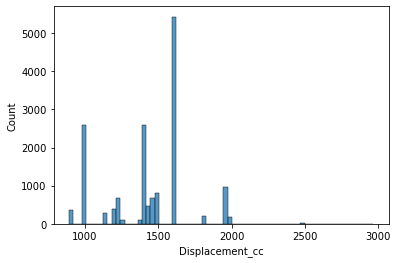

In [115]:
sns.histplot(df.Displacement_cc)

In [116]:
df.Weight_kg.describe()

count    15899.000000
mean      1337.580351
std        199.661388
min        840.000000
25%       1165.000000
50%       1295.000000
75%       1472.000000
max       2471.000000
Name: Weight_kg, dtype: float64

In [117]:
df.Drive_chain.value_counts()

front    15692
4WD        203
rear         4
Name: Drive_chain, dtype: int64

In [118]:
df = df[df.Drive_chain  != 'rear']

In [119]:
df.Drive_chain.value_counts()

front    15692
4WD        203
Name: Drive_chain, dtype: int64

In [120]:
df.cons_comb.describe()

count    15895.000000
mean         4.832120
std          0.867531
min          3.000000
25%          4.100000
50%          4.800000
75%          5.400000
max          9.100000
Name: cons_comb, dtype: float64

In [121]:
df.shape

(15895, 19)

<AxesSubplot:>

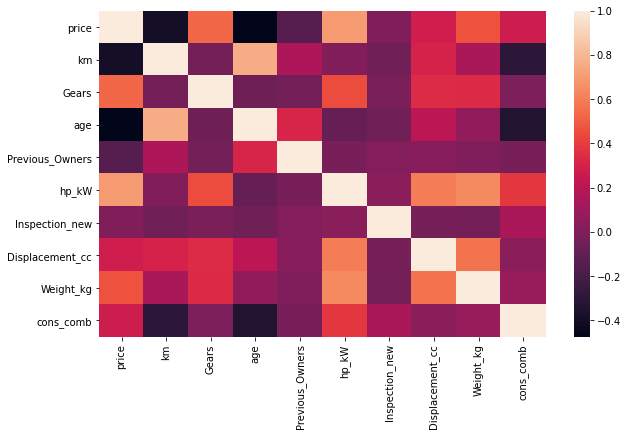

In [122]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())


In [123]:
df.head().T


,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible
km,56013.0,80000.0,83450.0,73000.0,16200.0
Type,Used,Used,Used,Used,Used
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel
Gears,7.0,7.0,7.0,6.0,7.0
age,3.0,2.0,3.0,3.0,3.0
Previous_Owners,2.0,1.0,1.0,1.0,1.0


In [124]:
df= pd.get_dummies(df,drop_first=True)


In [125]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
price,15770.0,14500.0,14640.0,14500.0,16790.0,15090.0,16422.0,14480.0,16700.0,17990.0
km,56013.0,80000.0,83450.0,73000.0,16200.0,63668.0,62111.0,14986.0,57000.0,16103.0
Gears,7.0,7.0,7.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0
age,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
Previous_Owners,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
hp_kW,66.0,141.0,85.0,66.0,66.0,85.0,85.0,66.0,85.0,70.0
Inspection_new,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
Displacement_cc,1422.0,1798.0,1598.0,1422.0,1422.0,1598.0,1598.0,1422.0,1598.0,999.0
Weight_kg,1220.0,1255.0,1135.0,1195.0,1135.0,1135.0,1195.0,1180.0,1275.0,1135.0
cons_comb,3.8,5.6,3.8,3.8,4.1,3.5,3.7,3.7,3.7,4.2


In [126]:
df2=pd.get_dummies(df) 

In [127]:
df2.shape

(15895, 36)

In [128]:
df.shape

(15895, 36)

In [129]:
y = df.price

In [130]:
X=df.drop("price",axis=1)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [132]:
lm=LinearRegression().fit(X_train, y_train)

In [133]:
lm.coef_

array([-3.56551542e-02,  6.56891532e+02, -1.75129829e+03,  2.41637509e+02,
        1.03796269e+02, -2.16029702e+02, -9.24963003e-01, -1.29950181e+00,
        2.90800342e+02,  1.06674439e+03, -3.98966076e+03, -5.39497876e+03,
       -1.40329176e+03, -5.54909939e+03, -1.00194638e+04,  3.56951379e+03,
       -5.77032573e+02, -3.28274983e+02,  9.04777547e+01,  3.33004399e+02,
       -8.43189849e+02,  1.97889749e+03,  3.81617207e+02, -3.65763847e+03,
       -1.36623737e+03, -2.96785944e+03, -3.34599658e+03,  1.15678466e+03,
        5.16355122e+02,  2.05577258e+03,  1.12615481e+02,  8.78235656e+02,
       -1.53179522e+03,  2.73658602e+03, -2.01236097e+03])

In [134]:
y_pred = lm.predict(X_test)

In [135]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [136]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8645992492007557
MAE 		: 1883.1035861537728
MSE 		: 7305339.728508112
RMSE 		: 2702.8391976786397


In [137]:
lm.score(X_train,y_train)

0.8685317557047424

In [138]:
rm=Ridge().fit(X_train,y_train)

In [139]:
y_pred = rm.predict(X_test)

In [140]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8644249852334516
MAE 		: 1883.8872807362638
MSE 		: 7314741.87344512
RMSE 		: 2704.5779473783186


In [141]:
ls=Lasso().fit(X_train,y_train)

In [142]:
y_pred = ls.predict(X_test)

In [143]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8643093743590082
MAE 		: 1884.5446699388626
MSE 		: 7320979.480763646
RMSE 		: 2705.7308588925926


In [144]:
ls.score(X_train,y_train)

0.8684695095654453

In [145]:
ls.coef_

array([-3.56499321e-02,  6.67070058e+02, -1.75039585e+03,  2.47955884e+02,
        1.04690810e+02, -2.07097658e+02, -9.75564870e-01, -1.27897783e+00,
        2.82691495e+02,  1.07996695e+03, -3.96061554e+03, -5.33301525e+03,
       -1.37344277e+03, -5.49549571e+03, -9.19472342e+03,  3.51115263e+03,
       -0.00000000e+00, -2.95301224e+02,  9.08525491e+01,  3.19388329e+02,
       -6.16769044e+02,  2.02470794e+03,  3.46140074e+02, -3.55572023e+03,
       -1.27551872e+03, -2.86671422e+03, -3.26475611e+03,  1.16336563e+03,
        2.44532043e+02,  1.45582478e+03,  4.82956137e+01,  8.76295219e+02,
       -1.52222458e+03,  2.68658269e+03, -1.79382559e+03])